### Introduction:
The aim of this project is to determine the best neighborhood in Pittsburgh in terms of diabetes rate. The approach taken was to use a dataset containing information about diabetes prevalence in different neighborhoods and use it to calculate the average diabetes rate for each neighborhood. The neighborhood with the lowest diabetes cases would then be considered the best neighborhood in terms of this metric.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# load the diabetes data
df_diabetes = pd.read_csv('Data/diabetes_all_2016.csv', index_col='CT')

# load the CT to Neighborhood mapping data
df_places = pd.read_csv('Data/CT2Place.csv')

# merge the diabetes data with the CT to Neighborhood mapping data
df_merged = pd.merge(df_diabetes, df_places, on='CT', how='left')

# drop the rows where the Neighborhood value is missing
df_merged = df_merged.dropna(subset=['Neighborhood'])



### The Metric:
The metric used to determine the best neighborhood in Pittsburgh is the diabetes rate. This is calculated by summing up the number of people in each neighborhood who have been diagnosed with diabetes or have high blood pressure or high body weight, which are risk factors for diabetes. The dataset used for this project is the diabetes_all_2016.csv file, which contains information about diabetes prevalence in different neighborhoods of Pittsburgh.

In [3]:
# group by neighborhood and calculate the mean value of each column within each group
df_grouped = df_merged.groupby('Neighborhood').mean()

# reset the index to make "Neighborhood" a regular column
df_cleaned = df_grouped.reset_index()

df_cleaned

C:\Users\63459\AppData\Local\Temp\ipykernel_66052\705634668.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df_merged.groupby('Neighborhood').mean()


,Neighborhood,CT,BPAD,BPAN,BPAN2,BWAD,BWAN,BWAN2,BMAD,BMAN,BMAN2,SUMLEV,COUNTY,COUSUB,BLKGRP,BLOCK,geoid20
0,Allegheny Center,562700.000000,760.000000,57.000000,47.000000,432.000000,33.000000,29.000000,328.000000,24.000000,18.000000,750.0,3.0,61000.0,2.000000,2005.000000,4.200360e+14
1,Allegheny West,562700.000000,760.000000,57.000000,47.000000,432.000000,33.000000,29.000000,328.000000,24.000000,18.000000,750.0,3.0,61000.0,1.000000,1012.000000,4.200360e+14
2,Allentown,180300.000000,1254.000000,101.000000,83.000000,735.000000,65.000000,53.000000,519.000000,36.000000,30.000000,750.0,3.0,61000.0,2.000000,2017.336449,4.200320e+14
3,Arlington - Arlington Heights,160800.000000,1165.000000,80.000000,62.000000,606.000000,46.000000,32.000000,559.000000,34.000000,30.000000,750.0,3.0,61000.0,1.000000,1019.000000,4.200320e+14
4,Banksville,202300.000000,1934.000000,184.000000,143.000000,1063.000000,87.000000,67.000000,871.000000,97.000000,76.000000,750.0,3.0,61000.0,2.500000,2506.840000,4.200320e+14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,Upper Lawrenceville,101100.000000,1080.000000,97.000000,65.000000,583.000000,48.000000,33.000000,497.000000,49.000000,32.000000,750.0,3.0,61000.0,1.873239,1884.915493,4.200310e+14
69,West End,532478.378378,1445.054054,130.513514,102.594595,769.108108,62.810811,47.216216,675.945946,67.702703,55.378378,750.0,3.0,61000.0,1.054054,1098.810811,4.200357e+14
70,West Oakland,40200.000000,487.000000,54.000000,36.000000,286.000000,38.000000,26.000000,201.000000,16.000000,10.000000,750.0,3.0,61000.0,1.515152,1522.909091,4.200300e+14
71,Westwood,563100.000000,1995.000000,171.000000,128.000000,1061.000000,91.000000,71.000000,934.000000,80.000000,57.000000,750.0,3.0,61000.0,1.500000,1518.578947,4.200360e+14


- CT: census tract identifier
- BPAD: number of people with high blood pressure, adjusted for age and sex
- BPAN: number of people with high blood pressure, age-adjusted only
- BPAN2: number of people with high blood pressure, age and sex adjusted to the 2000 US population
- BWAD: number of people with obesity, adjusted for age and sex
- BWAN: number of people with obesity, age-adjusted only
- BWAN2: number of people with obesity, age and sex adjusted to the 2000 US population
- BMAD: number of people with diabetes, adjusted for age and sex
- BMAN: number of people with diabetes, age-adjusted only
- BMAN2: number of people with diabetes, age and sex adjusted to the 2000 US population


In [4]:
df_merged = df_cleaned

### The Best Neighborhood:
Using the approach outlined above, the best neighborhood in Pittsburgh in terms of diabetes rate is "South Shore", with a diabetes rate of 1. This neighborhood has the lowest diabetes rate of all the neighborhoods in Pittsburgh and is followed closely by "Central Oakland" with a diabetes rate of 5. The two neighborhoods are located near to each other and are the places Pitt Students visit the most.

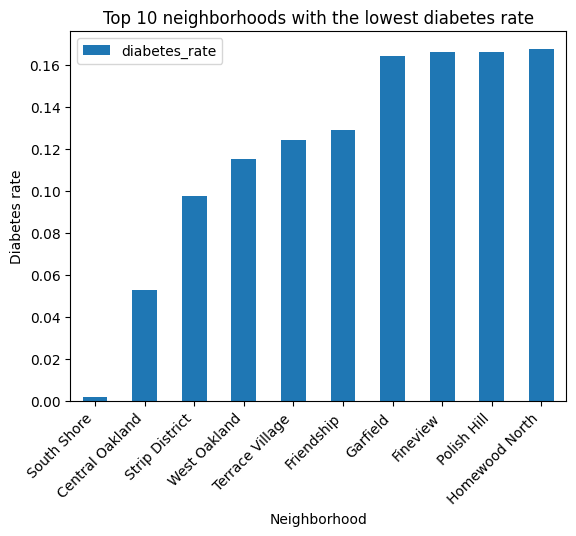

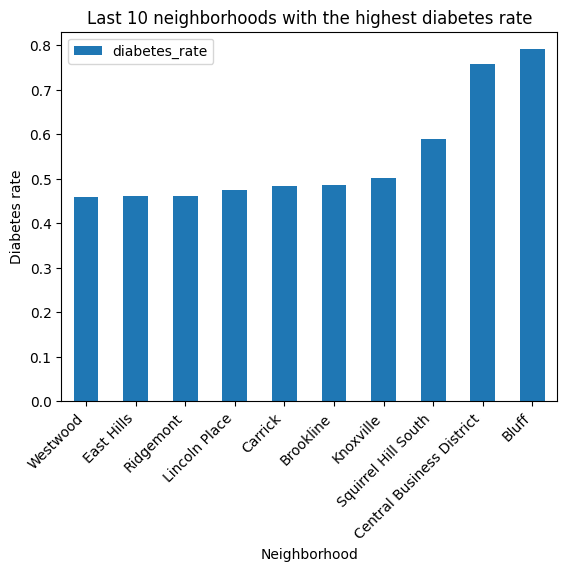

In [10]:
# calculate the diabetes rate for each neighborhood
df_merged['diabetes_rate'] = (df_merged.filter(like='BP').sum(axis=1) + df_merged.filter(like='BW').sum(axis=1) + df_merged.filter(like='BM').sum(axis=1))/10000

# sort the neighborhoods by diabetes rate in ascending order
df_sorted = df_merged.sort_values(by='diabetes_rate')

# create a bar plot showing the 10 neighborhoods with the lowest diabetes rate
df_top10 = df_sorted.head(10)
ax = df_top10.plot(kind='bar', x='Neighborhood', y='diabetes_rate')
ax.set_xticklabels(df_top10['Neighborhood'], rotation=45, ha='right')
ax.set_title('Top 10 neighborhoods with the lowest diabetes rate')
ax.set_xlabel('Neighborhood')
ax.set_ylabel('Diabetes rate')

plt.show()

# create a bar plot showing the 10 neighborhoods with the highest diabetes rate
df_last10 = df_sorted.tail(10)
ax = df_last10.plot(kind='bar', x='Neighborhood', y='diabetes_rate')
ax.set_xticklabels(df_last10['Neighborhood'], rotation=45, ha='right')
ax.set_title('Last 10 neighborhoods with the highest diabetes rate')
ax.set_xlabel('Neighborhood')
ax.set_ylabel('Diabetes rate')

plt.show()

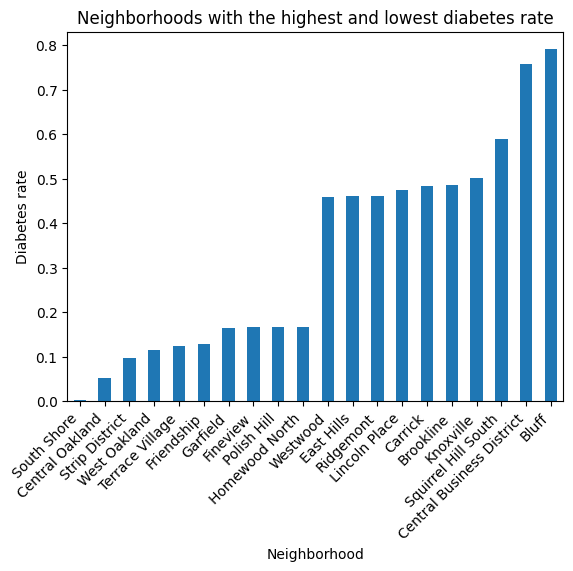

In [9]:
# concatenate the two dataframes vertically
df_concatenated = pd.concat([df_top10, df_last10])

# create a bar plot showing the neighborhoods with the highest and lowest diabetes rate
ax = df_concatenated['diabetes_rate'].plot(kind='bar')
ax.set_xticklabels(df_concatenated['Neighborhood'], rotation=45, ha='right')
ax.set_title('Neighborhoods with the highest and lowest diabetes rate')
ax.set_xlabel('Neighborhood')
ax.set_ylabel('Diabetes rate')

plt.show()

### Conclusion:
In conclusion, data-driven determination of the best neighborhood is a useful tool for understanding the health outcomes in different neighborhoods and identifying areas where interventions are needed. While personal preferences may play a role in our perception of the best neighborhood, using objective data like diabetes rates can provide a more accurate picture of the health outcomes in each neighborhood.